In [11]:
import requests
from urllib2 import *
from requests.auth import HTTPBasicAuth
from requests_oauthlib import OAuth1
import time
import rauth


%matplotlib inline
import matplotlib.pyplot as plt

# you don't have to use seaborn if you prefer plain matplotlib
import seaborn as sns
sns.set_style('white')
sns.set_context('paper')


import os, sys 
aPath='/Users/liuchang/Documents/STUDY/AM207/Yelp Dataset Challenge/data'
os.chdir(aPath)
os.path.dirname(os.path.abspath(sys.argv[0]))


'/Users/liuchang/Documents/STUDY/AM207/Yelp Dataset Challenge/data'

In [18]:
def _decode_list(data):
    rv = []
    for item in data:
        if isinstance(item, unicode):
            item = item.encode('utf-8')
        elif isinstance(item, list):
            item = _decode_list(item)
        elif isinstance(item, dict):
            item = _decode_dict(item)
        rv.append(item)
    return rv


def get_results(params):
    url = 'http://api.yelp.com/v2/search?'
    session = rauth.OAuth1Session(consumer_key='f4L-6UiAJHiMMT7PcYR0WQ',
        consumer_secret='p2R7sEZRFm9_VfaAGuwUVkRRiQk',
        access_token='LTD5ECUhPTNlqnM2xkU1UqBa0Cmh-oO6',
        access_token_secret='6GJrMt6rAY1zmZ3ec9DsWygKOfs')
    request= session.get(url, params=params)
    # print request
    data = request.json()
    # print data
    # session.close()
    return data
    

# #https://gist.github.com/phillipjohnson/8889618
def main():
#     locations =["AL",
# "AK",
# "AZ",
# "AR",
# "CA",
# "CO",
# "CT",
# "DE",
# "FL",
# "GA",
# "HI",
# "ID",
# "IL",
# "IN",
# "IA",
# "KS",
# "KY",
# "LA",
# "ME",
# "MD",
# "MA",
# "MI",
# "MN",
# "MS",
# "MO",
# "MT",
# "NE",
# "NV",
# "NH",
# "NJ",
# "NM",
# "NY",
# "NC",
# "ND",
# "OH",
# "OK",
# "OR",
# "PA",
# "RI",
# "SC",
# "SD",
# "TN",
# "TX",
# "UT",
# "VT",
# "VA",
# "WA",
# "WV",
# "WI",
# "WY"]
    locations =["Los Angeles"] #, "New York","Boston"]
    api_calls= []
    for lat in locations:
        # print lat
        params = get_search_parameters(lat)
        # print params
        # z=get_results(params)
        # print z
        api_calls.append(get_results(params))
        category=[]
    # print api_calls
    json_result = api_calls
    for number in range(len(locations)):
        # print number

        for i in json_result[number]['businesses']:
            # print i
            try:
                review_count=i['review_count']
                name=i['name'] 
                rating= i['rating']
                city=i['location']['city']
                #state=i['location']['state_code']
                postal_code=i['location']['postal_code']

                coordinate=i['location'].get('coordinate')
                # print coordinate
                if coordinate != None:
                    longitude= coordinate['longitude']
                    latitude=coordinate['latitude']
                    for h in i['categories']:
                        for z in h:
                            # print z
                            category.append(z)

                    category=[h.encode('utf-8') for h in category]
                    #print category
                    outfile.write("%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\n"%(name,rating,review_count,city,postal_code,latitude,longitude))


                else:
                    longitude="Null"
                    latitude="Null"
                    for h in i['categories']:
                        for z in h:
                            # print z
                            category.append(z)

                    category=[h.encode('utf-8') for h in category]
                    #print category
                
                #print category
                    outfile.write("%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\n"%(name,rating,review_count,city,postal_code,latitude,longitude))
            except:
                pass




def get_search_parameters(lat):
    #See the Yelp API for more details
    params = {}
    params["term"] = "food"
    params["location"]=lat
    params["Category"] = "restaurants"
    #params["limit"] = "10"
    return params

outfile=open("yelp_result2.txt","w")
outfile.write("%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\n"%("name","rating","review_count","city","category","postal_code","latitude","longitude"))
if __name__=="__main__":
    main()
   
outfile.close()

In [28]:
import csv

# convert a text file into a csv file
txt_file2 = r"yelp_academic_dataset_business.json"
csv_file = r"mycsv.csv"
in_txt = csv.reader(open(txt_file2, "rb"), delimiter = '\t')
out_csv = csv.writer(open(csv_file, 'wb'))

out_csv.writerows(in_txt)

In [8]:
with open("yelp_academic_dataset_business.json") as file:
    data = json.load(file)
type(data)

ValueError: Extra data: line 2 column 1 - line 61185 column 1 (char 674 - 55412111)

In [ ]:
with open("data.csv", "w") as file:
    csv_file = csv.writer(file)
    for item in data:
        csv_file.writerow([item['pk'], item['model']] + item['fields'].values())

In [5]:
import pandas as pd
import os
os.path.dirname(os.path.realpath("yelp_academic_dataset_business.json"))
os.chdir("")
#json_file=r"yelp_academic_dataset_business.json"
#pd.read_json(json_file)

'/Users/liuchang/Documents/STUDY/Projects'

IOError: [Errno 2] No such file or directory: 'yelp_academic_dataset_business.json'

In [12]:
import json

def load_json_file(file_path):
    """
    Builds a list of dictionaries from a JSON file

    :type file_path: string
    :param file_path: the path for the file that contains the businesses
    data
    :return: a list of dictionaries with the data from the files
    """
    records = [json.loads(line) for line in open(file_path)]

    return records

def tf_idf_tips(file_path):
    records = load_json_file(file_path)
    print type(records),type(records[4])

    data = [record['stars'] for record in records if 'Restaurants' in record['categories']]

    return data


tip_matrix = tf_idf_tips("yelp_academic_dataset_business.json")


<type 'list'> <type 'dict'>


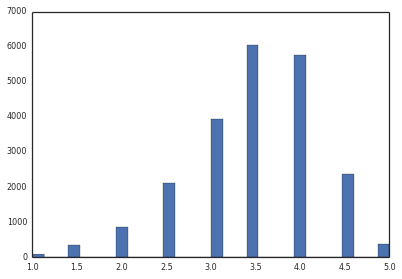

In [14]:
scores = tip_matrix
plt.hist(scores,bins=30)
plt.show()

In [15]:
import numpy as np
import numpy.random as npr
import pylab

def bootstrap(data, num_samples, statistic, alpha):
    """Returns bootstrap estimate of 100.0*(1-alpha) CI for statistic."""
    n = len(data)
    idx = npr.randint(0, n, (num_samples, n))
    samples = data[idx]
    stat = np.sort(statistic(samples, 1))
    return (stat[int((alpha/2.0)*num_samples)],
            stat[int((1-alpha/2.0)*num_samples)])

if __name__ == '__main__':
    # data of interest is bimodal and obviously not normal
    #x = np.concatenate([npr.normal(3, 1, 100), npr.normal(6, 2, 200)])
    x = scores
    # find mean 95% CI and 100,000 bootstrap samples
    low, high = bootstrap(x, 100000, np.mean, 0.05)

    # make plots
    pylab.figure(figsize=(15,10))
    pylab.subplot(121)
    pylab.hist(x, 50)
    pylab.title('Historgram of data')
    pylab.subplot(122)
    pylab.plot([-0.03,0.03], [np.mean(x), np.mean(x)], 'r', linewidth=2)
    pylab.scatter(0.1*(npr.random(len(x))-0.5), x)
    pylab.plot([0.19,0.21], [low, low], 'r', linewidth=2)
    pylab.plot([0.19,0.21], [high, high], 'r', linewidth=2)
    pylab.plot([0.2,0.2], [low, high], 'r', linewidth=2)
    pylab.xlim([-0.2, 0.3])
    pylab.title('Bootstrap 95% CI for mean')
    #pylab.savefig('examples/boostrap.png')

TypeError: only integer arrays with one element can be converted to an index

In [8]:
len(x)

300